In [1]:
%load_ext nb_black
# !pip install nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
data = data = pd.read_csv(
    "../../../../sep19SexAndAgeAddedFINAL DATASET_ver2.txt", sep=","
)

<IPython.core.display.Javascript object>

In [4]:
# Filter the data

# remove diabetic people
data = data[data.FIELD_16 != 1]
data = data[data.FIELD_23 != 1]

# remove hypertensive people who are diagnosed and on drugs
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_22!=1]

# remove people who are diagnosed and on drugs for high lipids
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_24!=1]

print(data.shape)

(516594, 406)


<IPython.core.display.Javascript object>

In [5]:
newdata = data.copy()
print(newdata.shape)
newdata.head()

(516594, 406)


,Unnamed: 0,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,FIELD_3,FIELD_4,FIELD_5,...,S004423,S004424,S005200,S007400,S008501,S008502,S008503,S008504,S010101,S010102
0,0,1000003,20130913,100000320130913,46.0,670212.0,0.0,NaN,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
1,1,1000003,20140613,100000320140613,47.0,670212.0,0.0,NaN,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,16.0
2,2,1000003,20150917,100000320150917,48.0,670212.0,0.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0
3,3,1000003,20160617,100000320160617,49.0,670212.0,0.0,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,18.0
4,4,1000003,20170608,100000320170608,50.0,670212.0,0.0,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,18.0


<IPython.core.display.Javascript object>

In [6]:
# for checking if there are two records per day
newdata_count_temp=newdata.groupby(by=['FIELD_1','FIELD_2']).size().reset_index(name='freq') 
# print(newdata_count_temp[newdata_count_temp.freq>1])

# group records by id and year to find out the number of tests per specific year
newdata_count_temp['Year']=(newdata_count_temp.FIELD_2 / 10000).astype(int)
newdata_count_peryear=newdata_count_temp.groupby(by=['FIELD_1','Year']).size().reset_index(name='freq')
# max(temp[temp.freq>1].freq)
newdata_count_peryear=newdata_count_peryear.sort_values(by='FIELD_1')
newdata_count_peryear.head()

# to get the number of years a patient visited
newdata_count_peryearG1= newdata_count_peryear.groupby(by=['FIELD_1']).size().reset_index(name='freq')
newdata_count_peryearG1.head()
print(newdata_count_peryearG1.freq.unique())
newdata_count_peryearG1=newdata_count_peryearG1[newdata_count_peryearG1.freq>1]
print(newdata_count_peryearG1.shape)
newdata_count_peryearG1.head()


[1 4 2 5 3 6]
(117617, 2)


,FIELD_1,freq
1,64,4
3,105,2
4,323,4
8,761,2
9,782,2


<IPython.core.display.Javascript object>

In [7]:
# newdata_count_peryearG1= newdata_count_peryear.groupby(by=['FIELD_1']).size().reset_index(name='freq')
# newdata_count_peryearG1.head()
# print(newdata_count_peryearG1.freq.unique())

# newdata_count_peryearG1.groupby(by='freq').size()



<IPython.core.display.Javascript object>

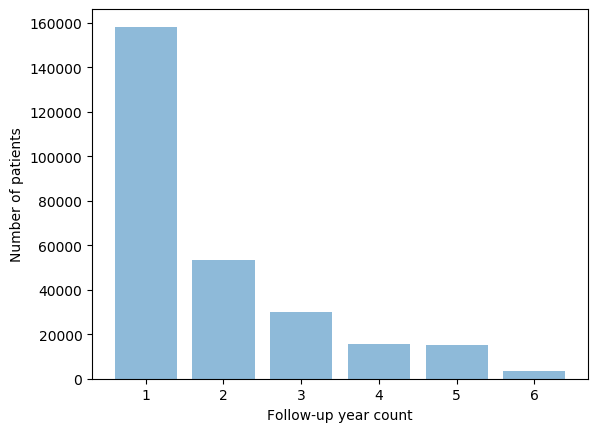

<IPython.core.display.Javascript object>

In [60]:
import matplotlib.pyplot as plt

plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (1, 2, 3, 4, 5, 6)
y_pos = np.arange(len(objects))
performance = [158241, 53415, 29811, 15796, 15046, 3549]

plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Number of patients")
plt.xlabel("Follow-up year count")

plt.show()

In [29]:
mylist = []
for i in newdata_count_peryearG1.FIELD_1:
    vals = newdata_count_peryear[newdata_count_peryear.FIELD_1 == i]
    mylist.append([i, np.sort(list(vals.Year)), len(vals.Year)])

<IPython.core.display.Javascript object>

In [78]:
mylistPD = pd.DataFrame(mylist, columns=["FIELD_1", "Years", "yearscount"])
print(mylistPD.shape)
mylistPD.tail(10)

(117617, 3)


,FIELD_1,Years,yearscount
117607,5542037,"[2014, 2018]",2
117608,5595210,"[2014, 2018]",2
117609,5654226,"[2014, 2015, 2016]",3
117610,5816083,"[2016, 2018]",2
117611,5825127,"[2016, 2018]",2
117612,5867953,"[2016, 2017]",2
117613,5884342,"[2014, 2015]",2
117614,5885504,"[2016, 2017]",2
117615,5887822,"[2016, 2017]",2
117616,5887825,"[2016, 2017]",2


<IPython.core.display.Javascript object>

In [79]:
mylistPD = mylistPD[mylistPD.yearscount >= 3][["FIELD_1", "Years"]]
print(mylistPD.shape)
mylistPD.head()

(64202, 2)


,FIELD_1,Years
0,64,"[2013, 2014, 2015, 2016]"
2,323,"[2013, 2014, 2015, 2016]"
5,852,"[2013, 2014, 2015, 2016, 2018]"
6,981,"[2013, 2016, 2017]"
7,1352,"[2013, 2014, 2017]"


<IPython.core.display.Javascript object>

In [80]:
len(mylistPD.Years)

64202

<IPython.core.display.Javascript object>

In [81]:
temp = mylistPD.copy()

<IPython.core.display.Javascript object>

In [82]:
# x.append(tempdata.iloc[tempdata.shape[0] - 1, :].values)

<IPython.core.display.Javascript object>

In [83]:
newdata['Year']=(newdata.FIELD_2 / 10000).astype(int)

x=[]
x2=[]
target=[]

for _id in mylistPD.FIELD_1:
    ID=_id
    years=mylistPD[mylistPD.FIELD_1==ID].Years.values

    for y in range(len(years[0])-2):
        dif=years[0][y+2] - years[0][y]
        if(dif==2):
            
            tempdata=newdata.query('FIELD_1=='+str(ID)+' and Year=='+str(years[0][y])).reset_index()         
            x.append(tempdata.iloc[tempdata.shape[0]-1,:].values)

            tempdata=newdata.query('FIELD_1=='+str(ID)+' and Year=='+str(years[0][y+1])).reset_index()         
            x2.append(tempdata.iloc[tempdata.shape[0]-1,:].values)
            
            tempdata=newdata.query('FIELD_1=='+str(ID)+' and Year=='+str(years[0][y+2])).reset_index()         
            target.append(tempdata.iloc[tempdata.shape[0]-1,:].values)



<IPython.core.display.Javascript object>

In [84]:
newdata.head()

,Unnamed: 0,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,FIELD_3,FIELD_4,FIELD_5,...,S004424,S005200,S007400,S008501,S008502,S008503,S008504,S010101,S010102,Year
0,0,1000003,20130913,100000320130913,46.0,670212.0,0.0,NaN,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0,2013
1,1,1000003,20140613,100000320140613,47.0,670212.0,0.0,NaN,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,16.0,2014
2,2,1000003,20150917,100000320150917,48.0,670212.0,0.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,2015
3,3,1000003,20160617,100000320160617,49.0,670212.0,0.0,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,18.0,2016
4,4,1000003,20170608,100000320170608,50.0,670212.0,0.0,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,18.0,2017


<IPython.core.display.Javascript object>

In [85]:
np.array(target).shape

(97071, 408)

<IPython.core.display.Javascript object>

In [86]:
# x

<IPython.core.display.Javascript object>

In [87]:
# print(list(newdata.columns))

newcollist = newdata.columns
newcollist = np.insert(newcollist, 0, "index")
newcollist

Index(['index', 'Unnamed: 0', 'FIELD_1', 'FIELD_2', 'COMPARE', 'AGE', 'B_DAY',
       'SEX', 'FIELD_3', 'FIELD_4',
       ...
       'S004424', 'S005200', 'S007400', 'S008501', 'S008502', 'S008503',
       'S008504', 'S010101', 'S010102', 'Year'],
      dtype='object', length=408)

<IPython.core.display.Javascript object>

In [88]:
newdata.shape
tempcols = newcollist
# print(list(newdata.columns))

<IPython.core.display.Javascript object>

In [89]:
xlable = pd.DataFrame(x, columns=tempcols).drop(columns="Unnamed: 0")
xlable.tail(10)

,index,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,FIELD_3,FIELD_4,FIELD_5,...,S004424,S005200,S007400,S008501,S008502,S008503,S008504,S010101,S010102,Year
97061,338005,5017860,20161219,501786020161219,34.0,820101.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,16.0,2016
97062,339516,5032957,20161227,503295720161227,30.0,860906.0,0.0,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
97063,340075,5039015,20161230,503901520161230,25.0,910624.0,1.0,1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
97064,355427,5261243,20151117,526124320151117,41.0,740728.0,0.0,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,19.0,2015
97065,363830,5350256,20140903,535025620140903,51.0,630726.0,0.0,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,17.0,2014
97066,363831,5350256,20150721,535025620150721,52.0,630726.0,0.0,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,2015
97067,383108,5527524,20130706,552752420130706,38.0,750116.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,2013
97068,383109,5527524,20140901,552752420140901,39.0,750116.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,10.0,2014
97069,383110,5527524,20150905,552752420150905,40.0,750116.0,1.0,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,2015
97070,394319,5654226,20140616,565422620140616,31.0,830802.0,1.0,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,18.0,2014


<IPython.core.display.Javascript object>

In [90]:
xlable2 = pd.DataFrame(x2, columns=tempcols).drop(columns="Unnamed: 0")
xlable2.tail(10)

,index,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,FIELD_3,FIELD_4,FIELD_5,...,S004424,S005200,S007400,S008501,S008502,S008503,S008504,S010101,S010102,Year
97061,338006,5017860,20170620,501786020170620,35.0,820101.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,2017
97062,339517,5032957,20171227,503295720171227,31.0,860906.0,0.0,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
97063,340076,5039015,20171110,503901520171110,26.0,910624.0,1.0,1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
97064,355428,5261243,20161020,526124320161020,42.0,740728.0,0.0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0,2016
97065,363831,5350256,20150721,535025620150721,52.0,630726.0,0.0,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,2015
97066,363832,5350256,20160622,535025620160622,53.0,630726.0,0.0,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,2016
97067,383109,5527524,20140901,552752420140901,39.0,750116.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,10.0,2014
97068,383110,5527524,20150905,552752420150905,40.0,750116.0,1.0,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,2015
97069,383111,5527524,20160806,552752420160806,41.0,750116.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,11.0,2016
97070,394320,5654226,20151125,565422620151125,32.0,830802.0,1.0,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,14.0,2015


<IPython.core.display.Javascript object>

In [91]:
targelable = pd.DataFrame(target, columns=tempcols).drop(columns="Unnamed: 0")
targelable.tail(10)

,index,FIELD_1,FIELD_2,COMPARE,AGE,B_DAY,SEX,FIELD_3,FIELD_4,FIELD_5,...,S004424,S005200,S007400,S008501,S008502,S008503,S008504,S010101,S010102,Year
97061,338007,5017860,20180609,501786020180609,36.0,820101.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,2018
97062,339518,5032957,20180621,503295720180621,32.0,860906.0,0.0,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
97063,340077,5039015,20180628,503901520180628,27.0,910624.0,1.0,1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
97064,355429,5261243,20170602,526124320170602,43.0,740728.0,0.0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,18.0,2017
97065,363832,5350256,20160622,535025620160622,53.0,630726.0,0.0,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,2016
97066,363833,5350256,20170904,535025620170904,54.0,630726.0,0.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,17.0,2017
97067,383110,5527524,20150905,552752420150905,40.0,750116.0,1.0,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,2015
97068,383111,5527524,20160806,552752420160806,41.0,750116.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,11.0,2016
97069,383112,5527524,20171207,552752420171207,42.0,750116.0,1.0,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,12.0,2017
97070,394321,5654226,20160826,565422620160826,33.0,830802.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,2016


<IPython.core.display.Javascript object>

In [92]:
print(xlable.shape)
print(xlable2.shape)
print(targelable.shape)

(97071, 407)
(97071, 407)
(97071, 407)


<IPython.core.display.Javascript object>

In [93]:
# targelable.to_csv('_targelable4_withNa_AllColumns_OnDrugForLipid.txt',sep=',')
# xlable.to_csv('_xlable4_withNa_AllColumns_OnDrugForLipid.txt',sep=',')

<IPython.core.display.Javascript object>

In [94]:
targelable.to_csv("TargetLable_onlyDiabeticRemoved.txt", sep=",")
xlable2.to_csv("XLable_onlyDiabeticRemoved2.txt", sep=",")
xlable.to_csv("XLable_onlyDiabeticRemoved.txt", sep=",")

<IPython.core.display.Javascript object>

In [95]:
print(xlable.shape)
print(xlable2.shape)
print(targelable.shape)

(97071, 407)
(97071, 407)
(97071, 407)


<IPython.core.display.Javascript object>